In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]
train_path = 'train'
valid_path = 'test'

In [3]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in vgg.layers:
  layer.trainable = False    

In [5]:
folders = glob('train/*')

In [6]:
folders

['train\\abhishek', 'train\\chetan', 'train\\New folder']

In [7]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
model = Model(inputs=vgg.input, outputs=prediction)

In [9]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

r = model.fit_generator(training_set,
                          validation_data=test_set,
                          epochs=5,
                          steps_per_epoch=len(training_set),
                          validation_steps=len(test_set))

Found 231 images belonging to 3 classes.
Found 75 images belonging to 3 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
8/8 [==============================] - 81s 10s/step - loss: 0.4468 - accuracy: 0.8095 - val_loss: 9.8109 - val_accuracy: 0.0000e+00
Epoch 2/5
8/8 [==============================] - 88s 11s/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 13.7927 - val_accuracy: 0.0000e+00
Epoch 3/5
8/8 [==============================] - 83s 10s/step - loss: 9.0544e-04 - accuracy: 1.0000 - val_loss: 15.6822 - val_accuracy: 0.0000e+00
Epoch 4/5
8/8 [==============================] - 84s 11s/step - loss: 1.9376e-04 - accuracy: 1.0000 - val_loss: 16.5914 - val_accuracy: 0.0000e+00
Epoch 5/5
8/8 [==============================] - 83s 10s/step - loss: 6.0197e-05 - accuracy: 1.0000 - val_loss: 17.0279 - val_accuracy: 0.0000e+00


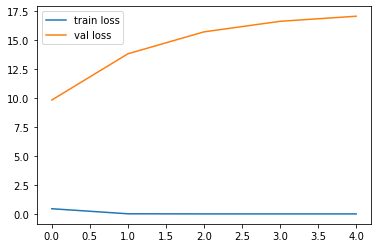

<Figure size 432x288 with 0 Axes>

In [12]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

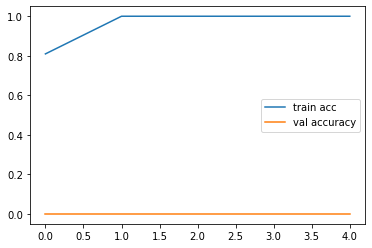

<Figure size 432x288 with 0 Axes>

In [13]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [14]:
import tensorflow as tf
from keras.models import load_model
model.save('facefeatures_new_model.h5')